In [1]:
library(tidyverse)
library(stringr)

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats


In [2]:
sim_dir <- "../simulations/toy_epistasis/"

In [3]:
list.files(sim_dir, pattern="n_100_.*.txt", full.names=TRUE)[1]

[1] "../simulations/toy_epistasis//n_100__s_1e-2__r_1e-2__f_0.05__rep_1.txt"

In [4]:
all_sims <- lapply(list.files(sim_dir, pattern="n_100_.*.txt", full.names=TRUE),
                   function(fname) {
                       suppressMessages(
                           read_tsv(fname) %>%
                           mutate(rep=as.integer(str_extract(fname, pattern="rep_\\d+") %>% str_replace("rep_", "")))
                       )
                   })

In [5]:
all_sims <- bind_rows(all_sims)

In [6]:
head(all_sims)

gen,f,init_f,s,r,rep
1,0.0500000,0.05,0.01,0.01,1
25,0.0491967,0.05,0.01,0.01,1
50,0.0463090,0.05,0.01,0.01,1
75,0.0421352,0.05,0.01,0.01,1
100,0.0378508,0.05,0.01,0.01,1
125,0.0335372,0.05,0.01,0.01,1


In [7]:
mean_sims <- all_sims %>%
    group_by(gen, init_f, s, r) %>%
    summarise(mean_f=mean(f),
              sd_f = sd(f, na.rm = TRUE),
              n_reps = n()) %>%
    ungroup %>% 
    mutate(init_f=factor(init_f),
           s=factor(s),
           r=factor(r)) %>%
    mutate(se_f = sd_f / sqrt(n_reps),
           lower_ci = mean_f - qt(1 - (0.05 / 2), n_reps - 1) * se_f,
           upper_ci = mean_f + qt(1 - (0.05 / 2), n_reps - 1) * se_f) %>%
    filter(gen %in% c(1, seq(100, 2000, 100)))

In [8]:
head(mean_sims)

gen,init_f,s,r,mean_f,sd_f,n_reps,se_f,lower_ci,upper_ci
1,0.05,1e-07,1e-07,0.05,0,20,0,0.05,0.05
1,0.05,1e-07,1e-06,0.05,0,20,0,0.05,0.05
1,0.05,1e-07,1e-05,0.05,0,20,0,0.05,0.05
1,0.05,1e-07,1e-04,0.05,0,20,0,0.05,0.05
1,0.05,1e-07,0.001,0.05,0,20,0,0.05,0.05
1,0.05,1e-07,0.01,0.05,0,20,0,0.05,0.05


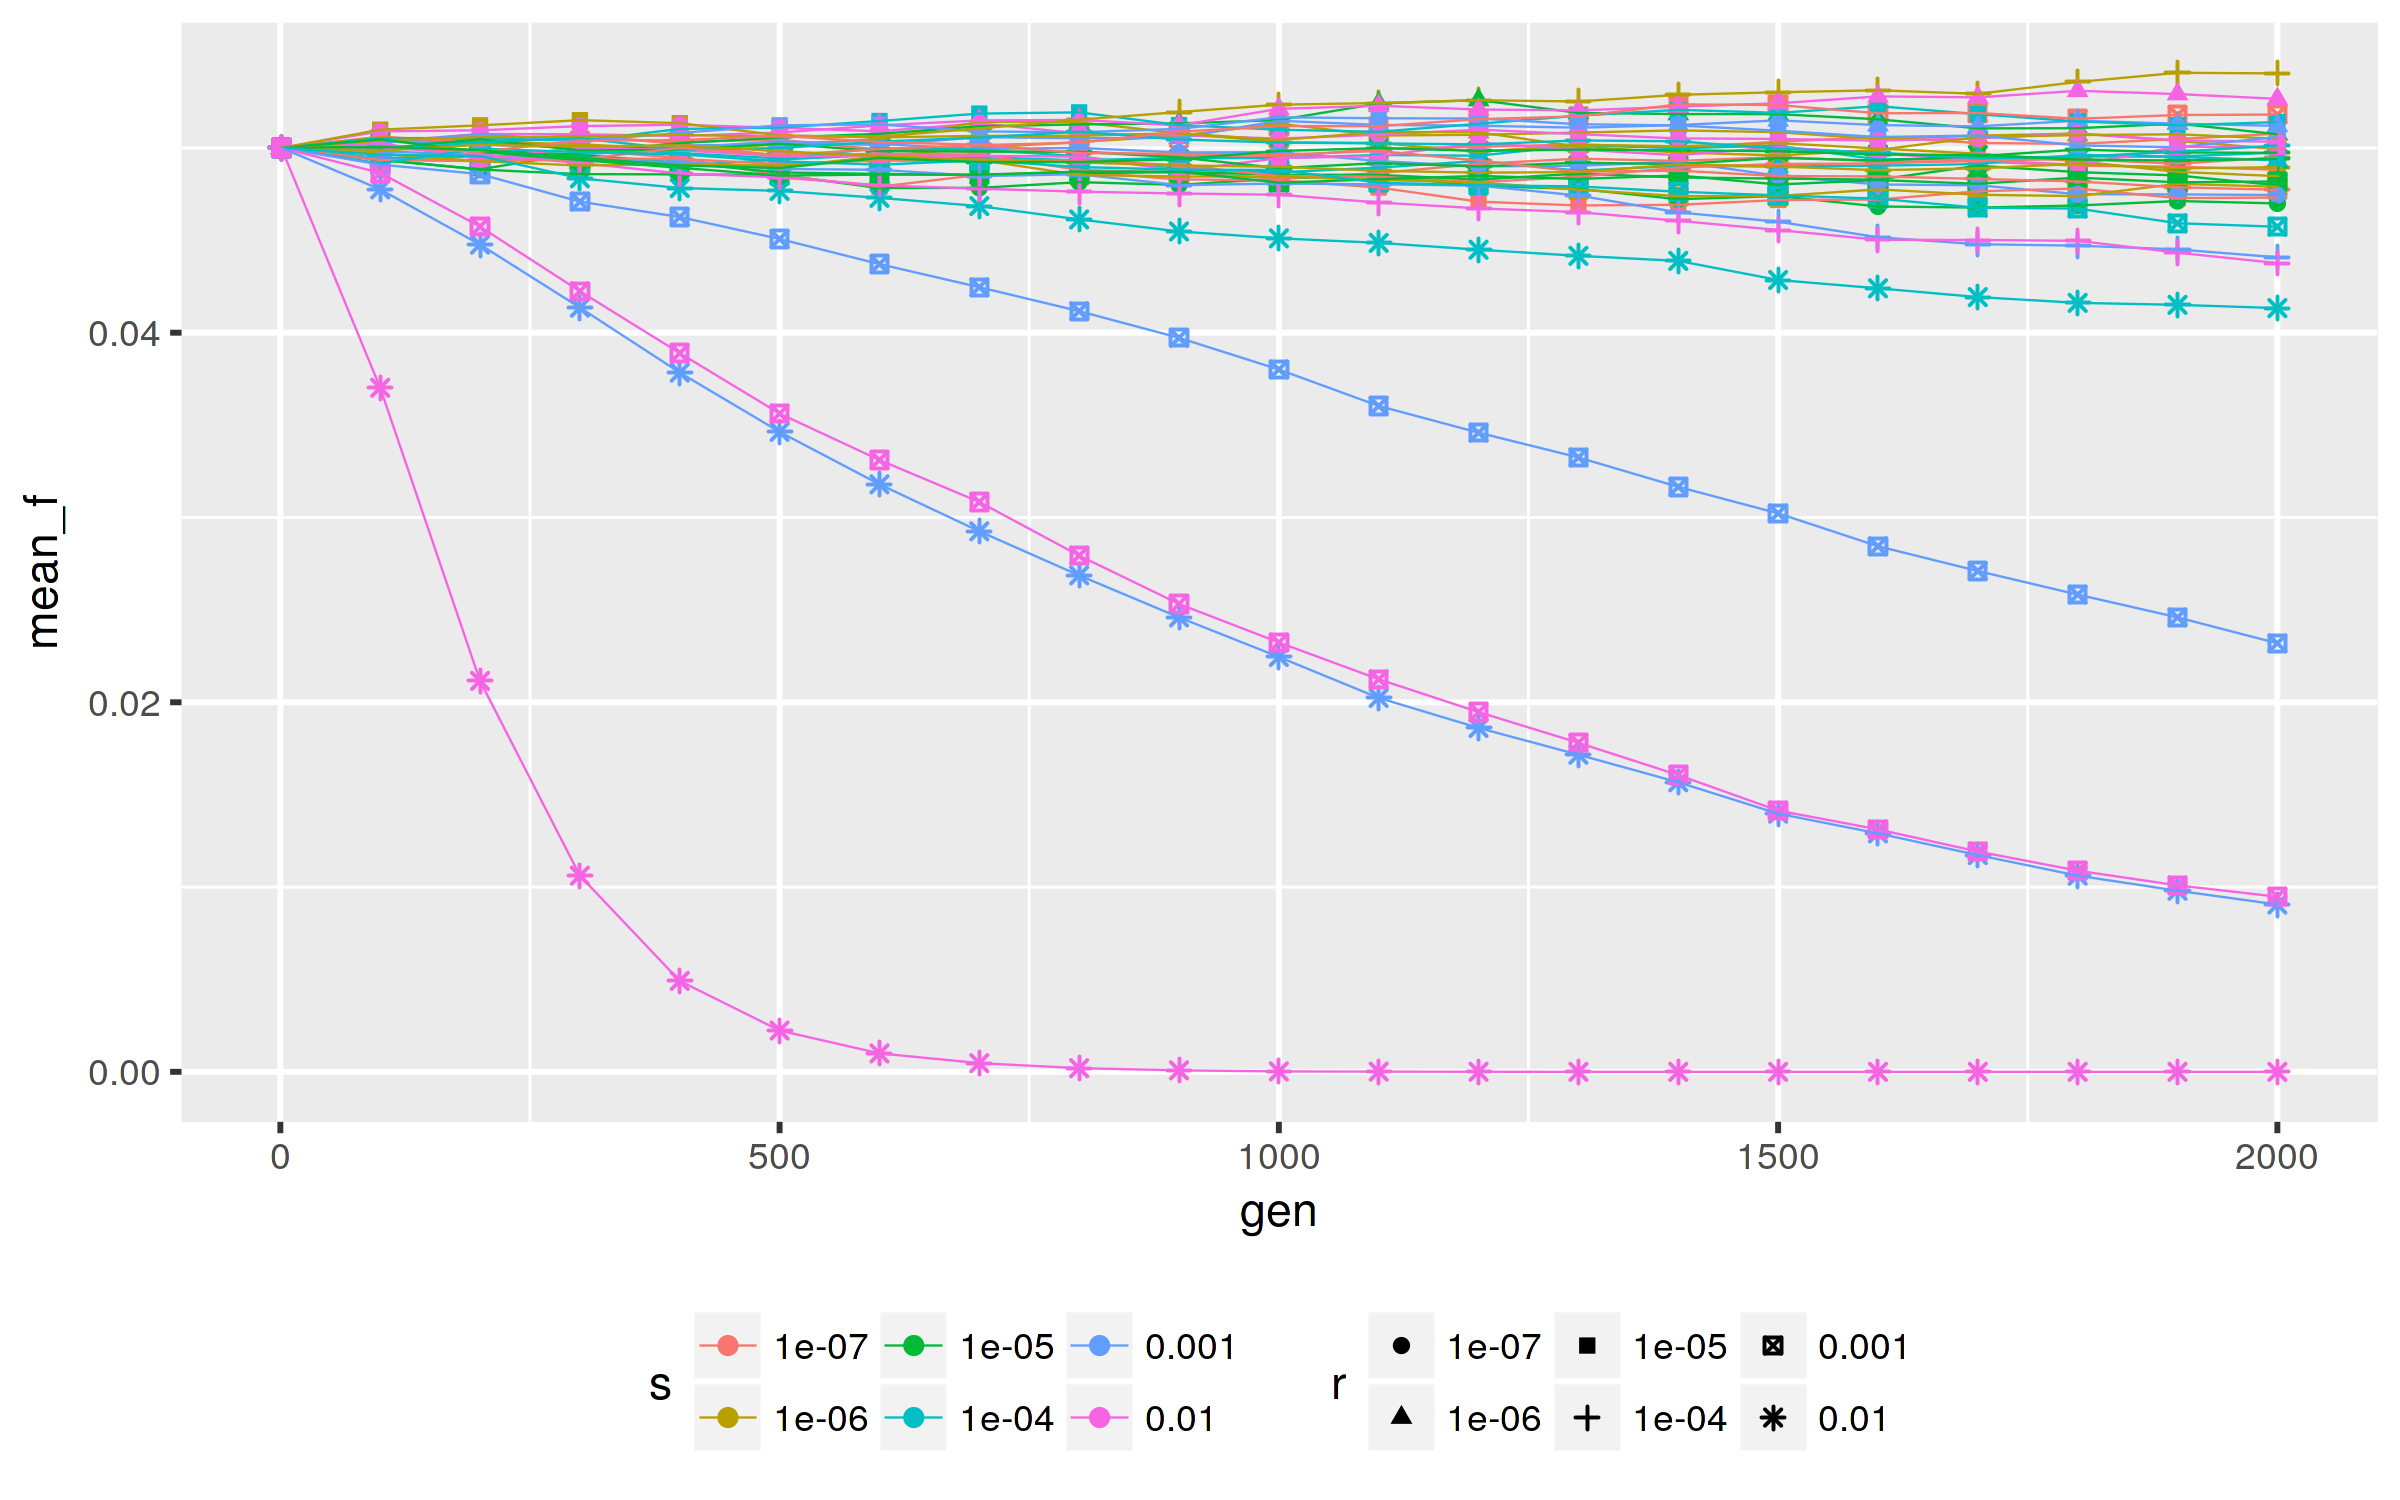

In [9]:
options(repr.plot.width=8, repr.plot.height=5, repr.plot.res=300)

ggplot(mean_sims, aes(gen, mean_f, colour=s, shape=r, group=interaction(s, r))) +
    geom_point() +
    geom_line(size=0.2) +
    theme(legend.position="bottom")

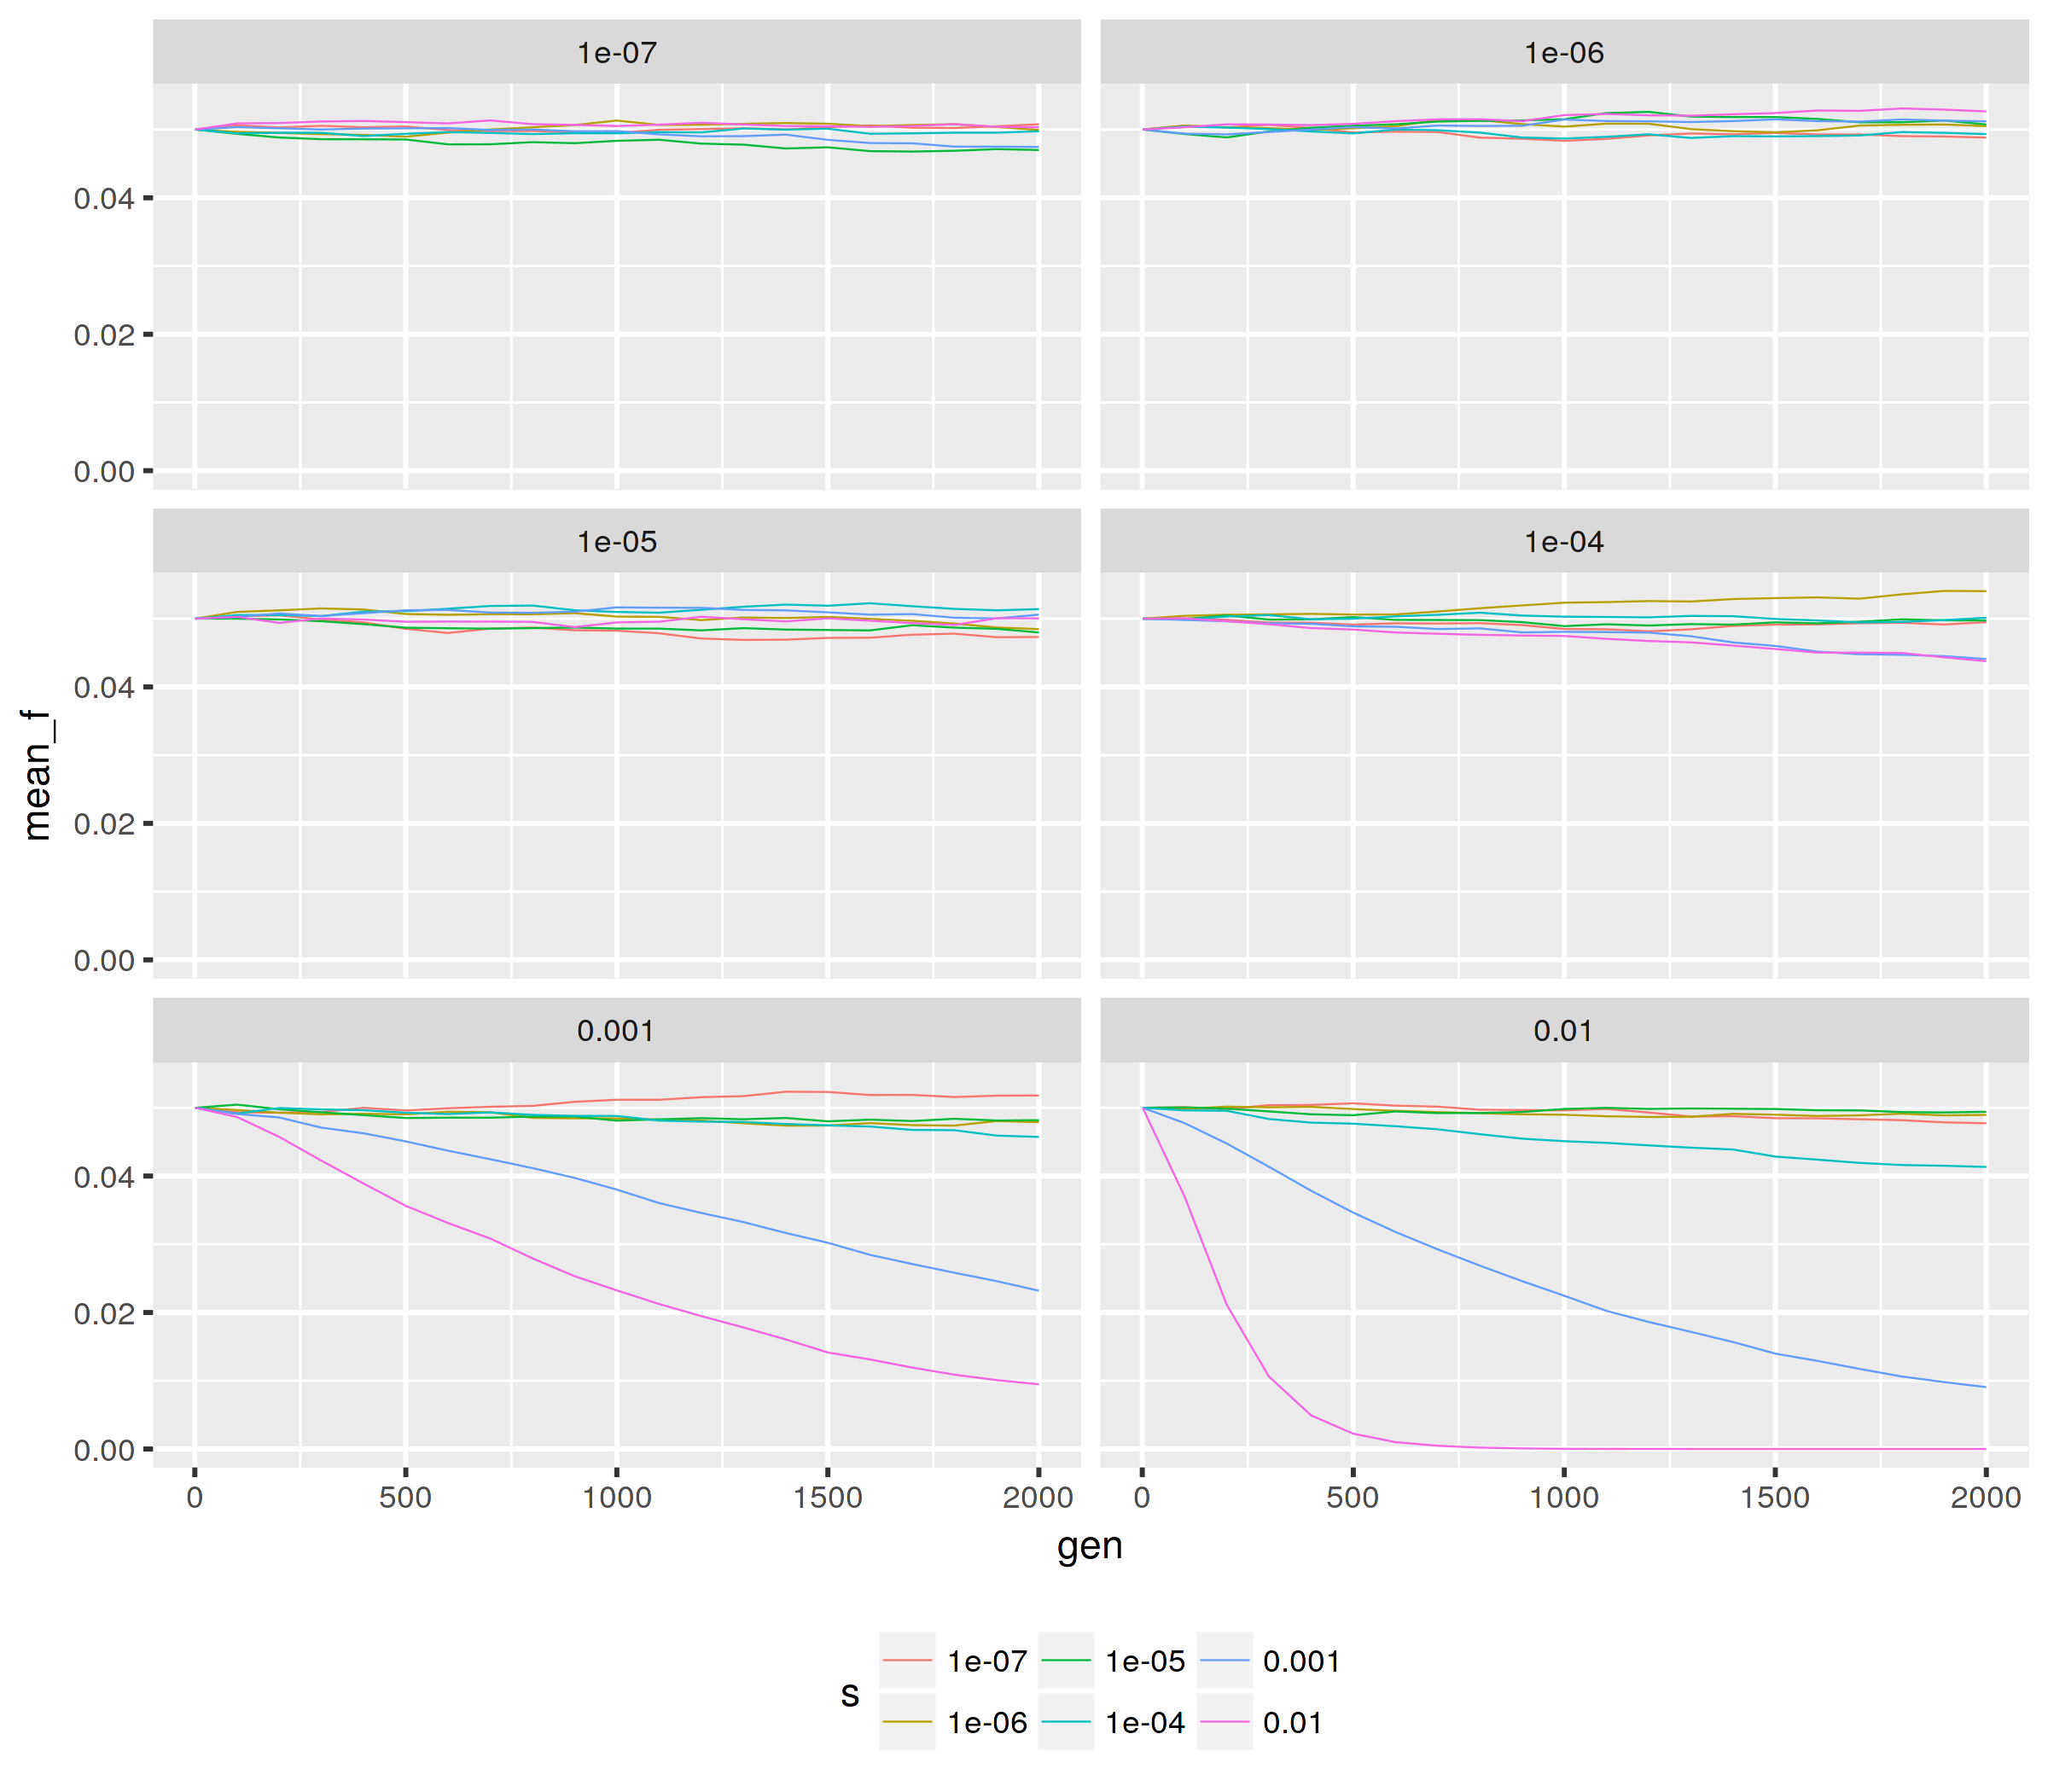

In [10]:
options(repr.plot.width=8, repr.plot.height=7, repr.plot.res=300)

ggplot(mean_sims, aes(gen, mean_f, colour=s, shape=r, group=interaction(s, r))) +
    #geom_point(size=1) +
    geom_line(size=0.2) +
    #geom_ribbon(aes(ymin=lower_ci, ymax=upper_ci, fill=s), size=0.1, alpha=1/10) +
    theme(legend.position="bottom") +
    facet_wrap( ~ r, ncol=2)

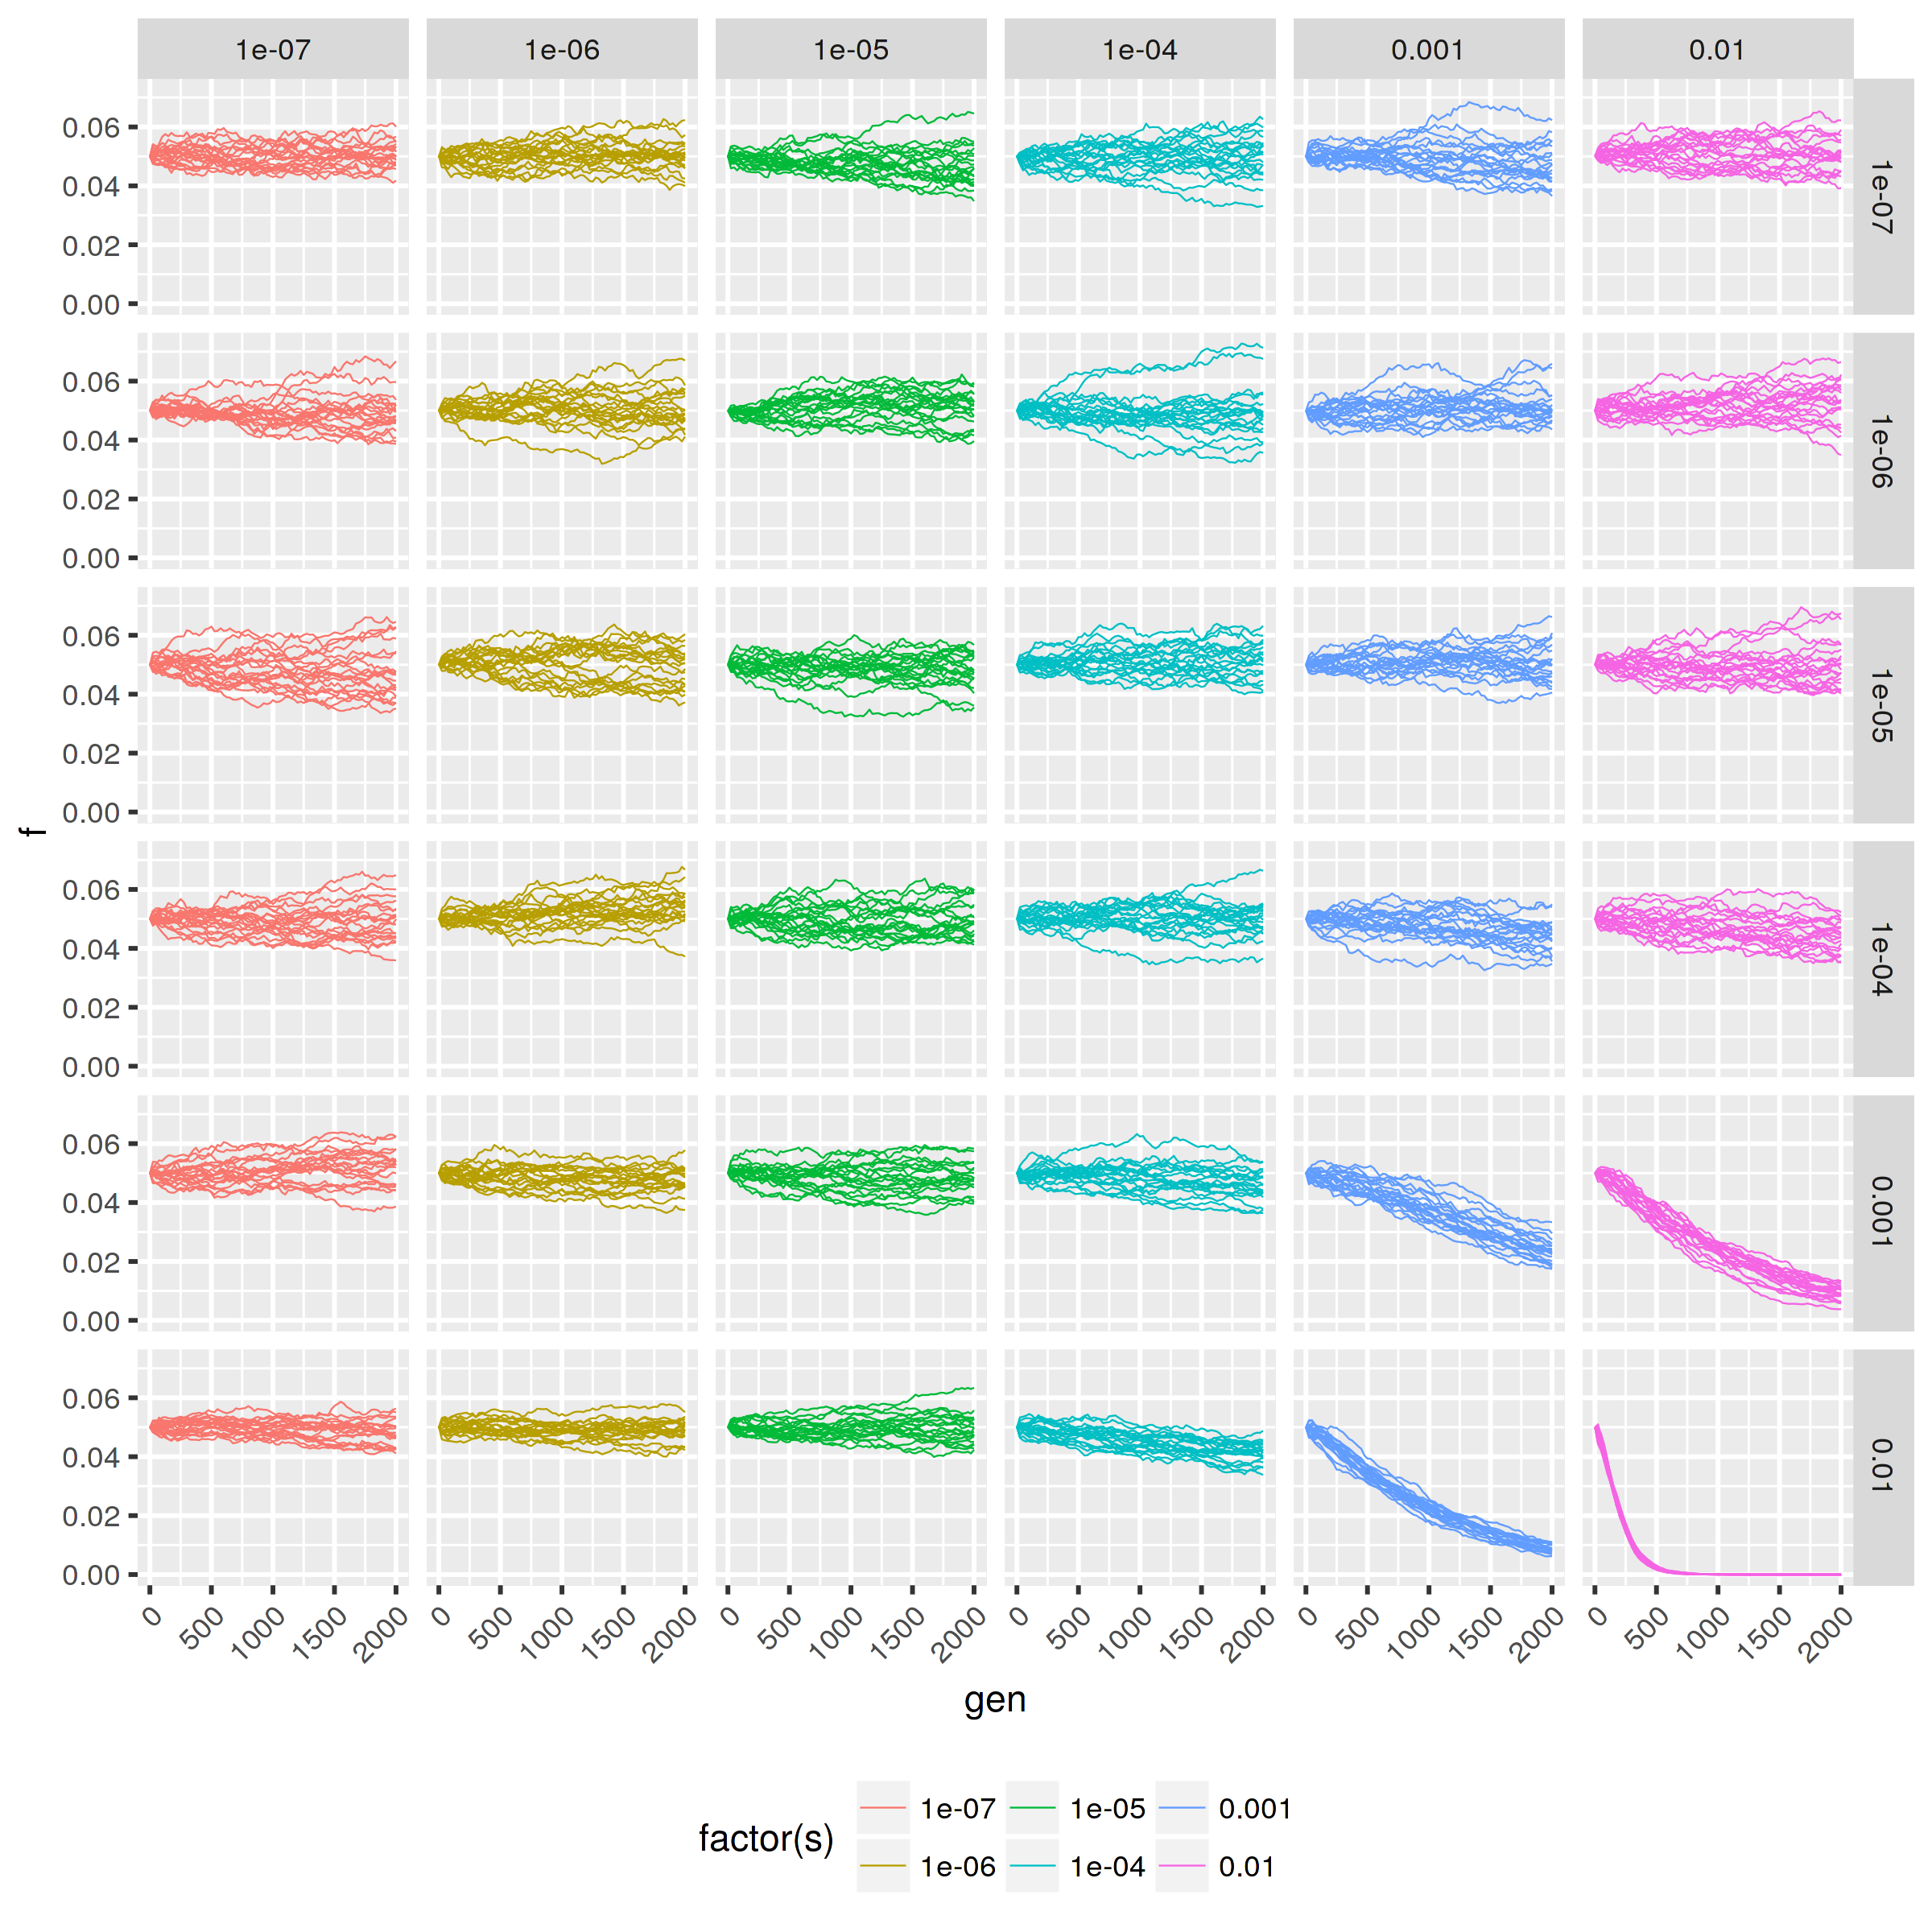

In [11]:
options(repr.plot.width=8, repr.plot.height=8, repr.plot.res=300)

ggplot(all_sims, aes(gen, f, group=rep, color=factor(s))) +
    geom_line(size=0.2) +
    theme(legend.position="bottom", axis.text.x=element_text(angle=45, hjust=1)) +
    facet_grid(r ~ s)

In [270]:
deterministic_solution <- function(p0, s, t) {
    p0 * exp(s * t / 2) / (p0 * exp(s * t / 2) + (1 - p0))
}

plot_trajectory <- function(p0, s, total_time) {
    options(repr.plot.width=6, repr.plot.height=3, repr.plot.res=120)

    f <- simulate_selection(p0, s, 0.5, total_time, 1)[, 1]
    qplot(x=1:total_time, y=deterministic_solution(p0, s, 1:total_time), geom="line", ylim=c(0, p0))
}

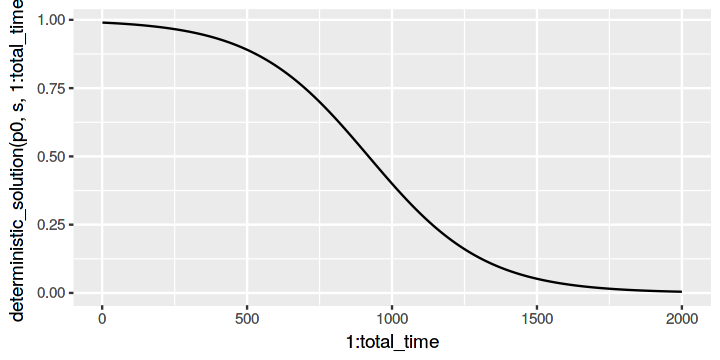

In [264]:
plot_trajectory(p0=0.99, s=-0.01, total_time=2000)

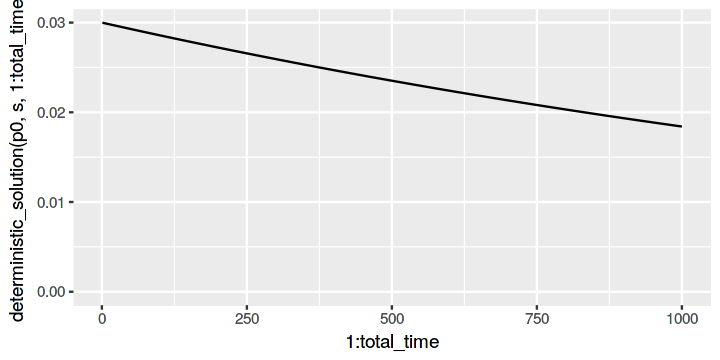

In [274]:
plot_trajectory(p0=0.03, s=-0.001, total_time=1000)